In [1]:
# Importing things 
import numpy as np
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.colors import LogNorm
import matplotlib.ticker as mticker
from matplotlib.ticker import ScalarFormatter
import matplotlib.colors as colors
import matplotlib.patches as mpatches

## Plotting preferences

In [2]:
# Font sizes
big_font = 25
medium_font = 20
small_font = 15

# Colours
my_colours = sns.color_palette("husl", 8)
my_colours

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

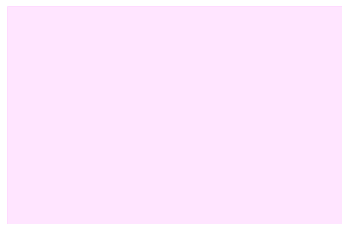

In [3]:
# Empty cells colours 
cmap_empty_cells = plt.get_cmap('cool_r')
empty_cells_alpha = 0.1
empty_cell_colour = cmap_empty_cells(plt.Normalize(-1, 1)(-1))[:-1] + (empty_cells_alpha,)

# Define a small figure to show the color
fig, ax = plt.subplots()
ax.add_patch(plt.Rectangle((0, 0), 1, 1, color=empty_cell_colour))
ax.axis('off')
plt.show()

## Data 

In [4]:
# Importing data file 
df = pd.read_csv('/Users/audreyburggraf/Desktop/THESIS/Data Files/1000_run_file_noise_wrong.csv')
df

,Inj.0P alpha0,Inj.0P delta0,Inj.0P pmra,Inj.0P pmdec,Inj.0P prlx,Inj.1P alpha0,Inj.1P delta0,Inj.1P pmra,Inj.1P pmdec,Inj.1P prlx,...,npBIC,wpBIC,DeltaBIC,Condition1,Condition2,Condition3,Detection,Astrometric Signature,Noise,S/N
0,260.531917,-53.825903,-55.143491,29.851194,22.307691,260.531917,-53.825903,-55.143491,29.851194,22.307691,...,1.303771,42.673048,-41.369277,1,1,1,1,350.088826,69.108524,7.886586
1,216.883731,28.059743,-69.426084,-7.400392,11.591075,216.883731,28.059743,-69.426084,-7.400392,11.591075,...,12.032920,42.589691,-30.556771,1,1,1,1,37.333228,234.944653,0.586068
2,54.990337,-39.550727,-72.971818,-91.577789,13.130407,54.990337,-39.550727,-72.971818,-91.577789,13.130407,...,5.475594,42.648532,-37.172937,1,1,1,1,152.112717,96.512859,3.637809
3,28.435793,33.844282,86.760752,-44.403295,15.781770,28.435793,33.844282,86.760752,-44.403295,15.781770,...,12.510534,42.595739,-30.085205,1,1,0,0,78.999012,669.721425,0.654930
4,78.083566,10.213649,-3.667909,-30.721172,13.069121,78.083566,10.213649,-3.667909,-30.721172,13.069121,...,12.434416,42.713766,-30.279350,1,0,0,0,84.988646,440.855440,0.467493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,257.271972,25.388589,-27.696986,-23.650874,13.834105,257.271972,25.388589,-27.696986,-23.650874,13.834105,...,-0.359194,42.705708,-43.064901,1,1,1,1,452.125069,59.993940,7.286447
996,122.026174,-4.519859,-8.939444,-12.407561,10.788197,122.026174,-4.519859,-8.939444,-12.407561,10.788197,...,10.939344,42.636530,-31.697186,1,1,0,0,21.277075,142.747090,0.167774
997,87.546444,-35.801933,136.606188,140.131432,14.929888,87.546444,-35.801933,136.606188,140.131432,14.929888,...,12.067080,42.620072,-30.552992,1,1,0,0,48.183912,205.361751,1.317290
998,168.081218,53.296848,-85.297788,-85.433708,10.231314,168.081218,53.296848,-85.297788,-85.433708,10.231314,...,12.788306,42.583198,-29.794892,1,1,0,0,2.650852,170.320231,0.197943


In [5]:
df.columns

Index(['Inj.0P alpha0', 'Inj.0P delta0', 'Inj.0P pmra', 'Inj.0P pmdec',
       'Inj.0P prlx', 'Inj.1P alpha0', 'Inj.1P delta0', 'Inj.1P pmra',
       'Inj.1P pmdec', 'Inj.1P prlx', 'Inj.1P e', 'Inj.1P omega',
       'Inj.1P Omega', 'Inj.1P cosi', 'Inj.1P log(m_p)', 'Inj.1P log(P)',
       'Inj.1P tp', 'Rec.0P alpha0', 'Rec.0P delta0', 'Rec.0P pmra',
       'Rec.0P pmdec', 'Rec0P prlx', 'Rec.1P alpha0', 'Rec.1P delta0',
       'Rec.1P pmra', 'Rec.1P pmdec', 'Rec.1P prlx', 'Rec.1P e',
       'Rec.1P omega', 'Rec.1P Omega', 'Rec.1P cosi', 'Rec.1P log(m_p)',
       'Rec.1P log(P)', 'Rec.1P tp', 'np_chi_sq', 'wp_chi_sq', 'npBIC',
       'wpBIC', 'DeltaBIC', 'Condition1', 'Condition2', 'Condition3',
       'Detection', 'Astrometric Signature', 'Noise', 'S/N'],
      dtype='object')

## Planetary Mass and Orbital Period 

### Bins
- Mass bins are in units of $M_J$
- Period bins are in units of years
- The bins are evenly spaced in logspace

In [6]:
# Setting the mass and period bins 
Mbins = np.logspace(np.log10(0.3), np.log10(13), 15) 
Pbins = np.logspace(-2, 1, 20) 

num_Pbins = len(Pbins) - 1
num_Mbins = len(Mbins) - 1

In [7]:
# Data in non-log units
mass_data = 10**df['Rec.1P log(m_p)'] # [M_J]
period_data = 10**df['Rec.1P log(P)'] # [years]

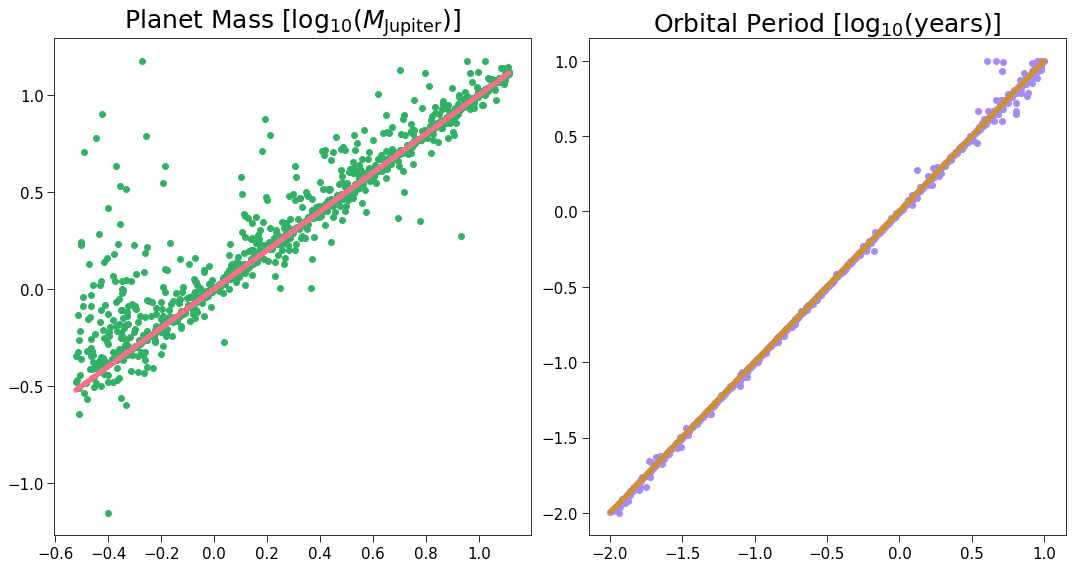

In [8]:
# Create a 2x1 figure of histograms
fig, axs = plt.subplots(1, 2, figsize=(15,8))

# Plot scatter for mass
axs[0].scatter(df['Inj.1P log(m_p)'], 
               df['Rec.1P log(m_p)'],
               color = my_colours[3])

# Plot line for mass
axs[0].plot(df['Inj.1P log(m_p)'], 
            df['Inj.1P log(m_p)'],
            color = my_colours[0],
            lw = 5)


axs[1].scatter(df['Inj.1P log(P)'], 
               df['Rec.1P log(P)'], 
               color = my_colours[-2])

axs[1].plot(df['Inj.1P log(P)'], 
            df['Inj.1P log(P)'],
            color = my_colours[1],
            lw = 5)

# Plot titles
axs[0].set_title('Planet Mass [$\log_{10}(M_{\mathrm{Jupiter}}$)]', fontsize=big_font)
axs[1].set_title('Orbital Period [$\log_{10}$(years)]', fontsize=big_font)

for i in range(2):
    axs[i].tick_params(labelsize=small_font, which='major', length=7)
    axs[i].tick_params(which='minor', length=4)


# Adjust layout
plt.tight_layout()

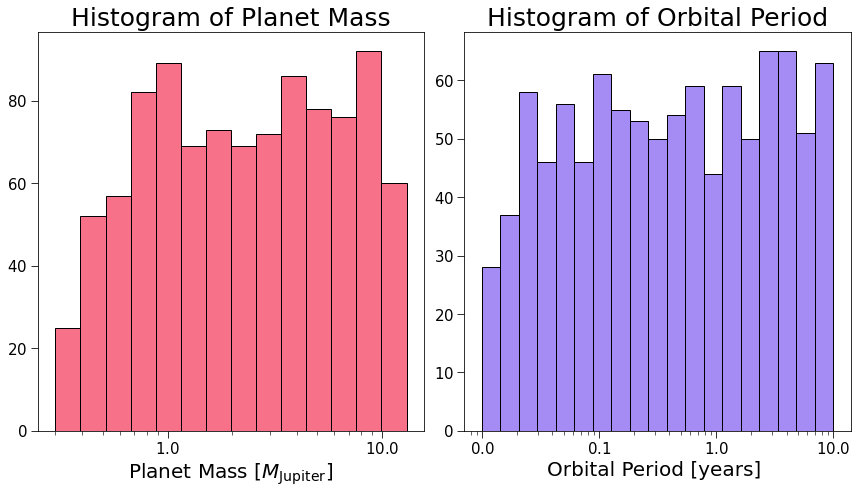

In [9]:
# Create a 2x1 figure of histograms
fig, axs = plt.subplots(1, 2, figsize=(12,7))

# Plot histogram for m_planet
axs[0].hist(mass_data, # [M_J]
            bins=Mbins, 
            color=my_colours[0], 
            edgecolor='black')

# Plot histogram for P
axs[1].hist(period_data, # [years]
            bins=Pbins, 
            color=my_colours[-2], 
            edgecolor='black')


# Plot titles
axs[0].set_title('Histogram of Planet Mass', fontsize=big_font)
axs[1].set_title('Histogram of Orbital Period', fontsize=big_font)

# Axes scale 
axs[0].set_xscale('log')
axs[1].set_xscale('log')

# Axes labels 
axs[0].set_xlabel('Planet Mass [$M_{\mathrm{Jupiter}}$]', fontsize=medium_font)
axs[1].set_xlabel('Orbital Period [years] ', fontsize=medium_font)

for i in range(2):
    axs[i].tick_params(labelsize=small_font, which='major', length=7)
    axs[i].tick_params(which='minor', length=4)


# Adjust layout
plt.tight_layout()

# Making axes labels not scientific notation
axs[0].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axs[0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

axs[1].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axs[1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Show the plot
plt.show()

## Detection

In [10]:
detection_data = df['Detection']

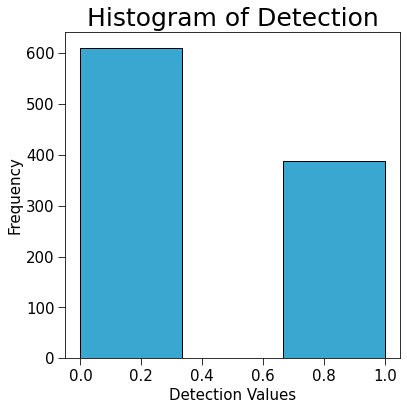

In [11]:
# Create a figure for the histogram
fig, ax = plt.subplots(figsize=(6, 6))  

# Plot histogram for detection data
ax.hist(detection_data, 
        bins=3, 
        color=my_colours[-3], 
        edgecolor='black')  # Adjust the number of bins as needed

# Titles and axes
ax.set_title('Histogram of Detection', fontsize=big_font)
ax.set_xlabel('Detection Values', fontsize=small_font)
ax.set_ylabel('Frequency', fontsize=small_font)

# Adjust ticks
ax.tick_params(labelsize=small_font, which='major', length=7)
ax.tick_params(which='minor', length=4)
    
# Show the plot
plt.show()

## Making detection data 

In [12]:
# Making arrays we will fill in the for loop 
num_planets_per_bin   = np.zeros((num_Pbins, num_Mbins))
num_detected          = np.zeros((num_Pbins, num_Mbins))
sensitivity           = np.zeros((num_Pbins, num_Mbins))
detection_uncertainty = np.zeros((num_Pbins, num_Mbins))

### $\text{Detection uncertainty} = \frac{\sqrt{\text{# of detections in bin}}}{\text{# of planets in bin}}$

In [13]:
# Iterate through each period bin
for i, p in enumerate(Pbins[:-1]):
    # Iterate through each mass bin
    for j, m in enumerate(Mbins[:-1]):
        
        # Mask to determine if data falls within the current period-mass bin
        mask = (mass_data >= Mbins[j]) & (mass_data < Mbins[j+1]) & (period_data >= Pbins[i]) & (period_data < Pbins[i+1])
        
        # Determine the number of detected planets in the current bin
        detected = mask & (detection_data == 1)
        
        # Find the number of planets/data points in the current bin
        num_planets_per_bin[i, j] = mask.sum()
        
        # Find the number of detected planets in the current bin
        num_detected[i, j] = detected.sum()
        
        # Check if the bin is empty; if so, set sensitivity and detection uncertainty to -1
        if num_planets_per_bin[i, j] == 0:
            sensitivity[i, j] = -1
            detection_uncertainty[i, j] = -1
        else:
            # Compute sensitivity and detection uncertainty if the bin is not empty
            sensitivity[i, j] = num_detected[i, j] / num_planets_per_bin[i, j]
            detection_uncertainty[i, j] = np.sqrt(num_detected[i, j]) / num_planets_per_bin[i, j]

In [14]:
# Empty cells occur where the sensitivity was set to -1
empty_cells = np.where(sensitivity == -1, -1, np.nan)

# Find and print the number of empty cells
num_empty_cells = np.sum(empty_cells == -1)
print('There are', num_empty_cells, 'empty cells')

There are 10 empty cells


# Plot: Period, mass, detection %
- x-axis: Period (years)
- y-axis: Mass ($M_J$)
- Axes should both be log 
- plot with plt.pcolormesh(period, mass, sensitivity.T)
- set to negative - set colour 

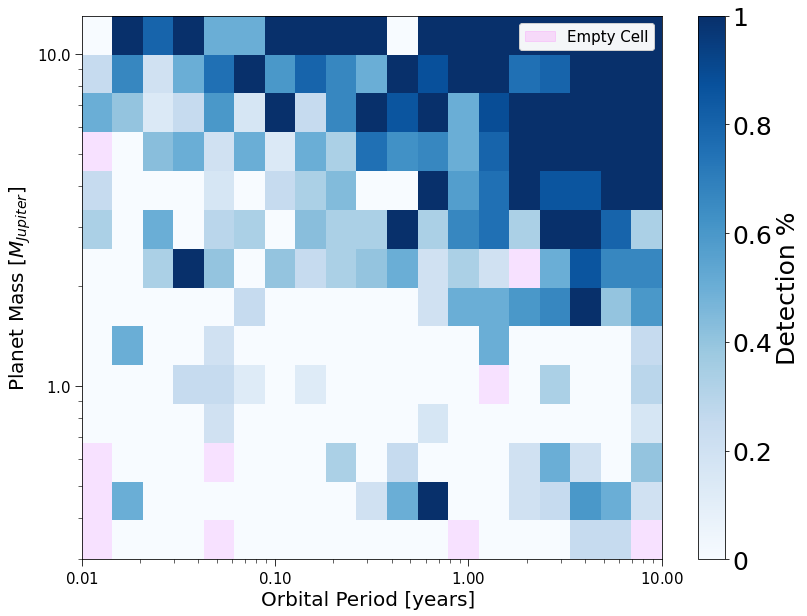

In [15]:
# Plotting the heatmap
fig, ax = plt.subplots(figsize=(13, 10))
         

im = ax.pcolormesh(Pbins,
                   Mbins,
                   sensitivity.T,
                   cmap='Blues',
                   vmin=0,
                   vmax=1)

# Color bar
cbar = plt.colorbar(im, format=mticker.FuncFormatter(lambda y, _: '{:g}'.format(y)), orientation='vertical')
cbar.set_label('Detection %', fontsize=big_font)
cbar.ax.tick_params(labelsize=big_font)

# Axes labels 
ax.set_xlabel('Orbital Period [years] ', fontsize=medium_font)
ax.set_ylabel('Planet Mass [$M_{Jupiter}$]', fontsize=medium_font)

# Adding ticks to axes
ax.tick_params(labelsize=small_font, which='major', length=7)
ax.tick_params(which='minor', length=4)


# Set log scale for both axes
ax.set_xscale('log')
ax.set_yscale('log')

# If there are empty cells then add them to the plot 
if num_empty_cells > 0:
    # Plotting the masked array
    im_mask = ax.pcolormesh(Pbins,
                            Mbins,
                            empty_cells.T,
                            cmap=cmap_empty_cells,
                            alpha=empty_cells_alpha)

    # Empty cell legend
    empty_cell_legend = ax.legend(handles=[mpatches.Rectangle((0, 0), 1, 1, color=empty_cell_colour)],
                                  labels=['Empty Cell'],
                                  loc='upper right',
                                  fontsize=small_font)
    
    # Add legend
    ax.add_artist(empty_cell_legend)

# Making axes labels not scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Occurence Plot

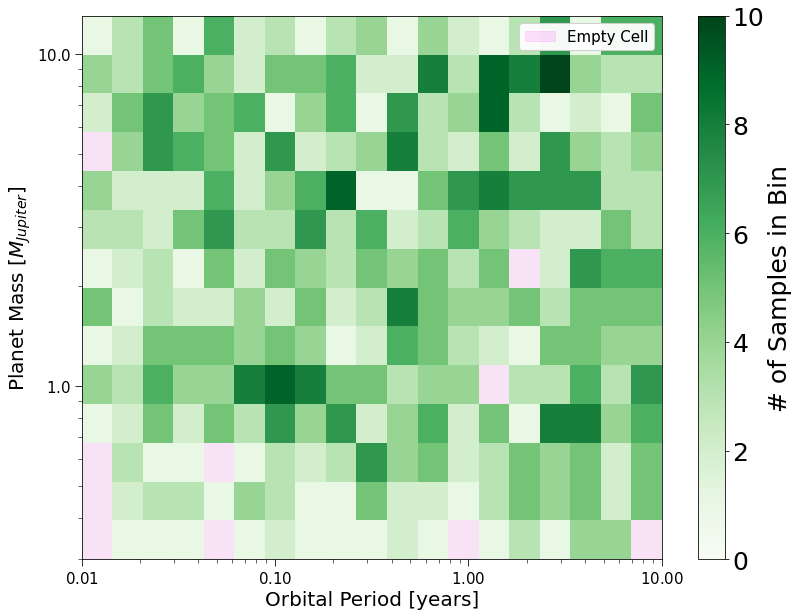

In [16]:
# Plotting the heatmap
fig, ax = plt.subplots(figsize=(13, 10))

# Plotting main heatmap
im = ax.pcolormesh(Pbins,
                   Mbins,
                   num_planets_per_bin.T,
                   cmap='Greens',
                   vmin=num_planets_per_bin.min(),
                   vmax=num_planets_per_bin.max())

# Plotting empty cells overlay
im_mask = ax.pcolormesh(Pbins,
                        Mbins,
                        empty_cells.T,
                        cmap=cmap_empty_cells,
                        alpha=empty_cells_alpha)

# Color bar setup
cbar = plt.colorbar(im, format=mticker.FuncFormatter(lambda y, _: '{:g}'.format(y)), orientation='vertical')
cbar.set_label('# of Samples in Bin', fontsize=big_font)
cbar.ax.tick_params(labelsize=big_font)

# Axes labels
ax.set_xlabel('Orbital Period [years]', fontsize=medium_font)
ax.set_ylabel('Planet Mass [$M_{Jupiter}$]', fontsize=medium_font)

# Adding ticks to axes
ax.tick_params(labelsize=small_font, which='major', length=7)
ax.tick_params(which='minor', length=4)

# Set log scale for both axes
ax.set_xscale('log')
ax.set_yscale('log')

# Formatting axes labels to avoid scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Adding legend for empty cells
empty_cell_legend = ax.legend(handles=[mpatches.Rectangle((0, 0), 1, 1, color=empty_cell_colour)], 
                              labels=['Empty Cell'], 
                              loc='upper right', 
                              fontsize=small_font)
ax.add_artist(empty_cell_legend)


# Uncertainty Map

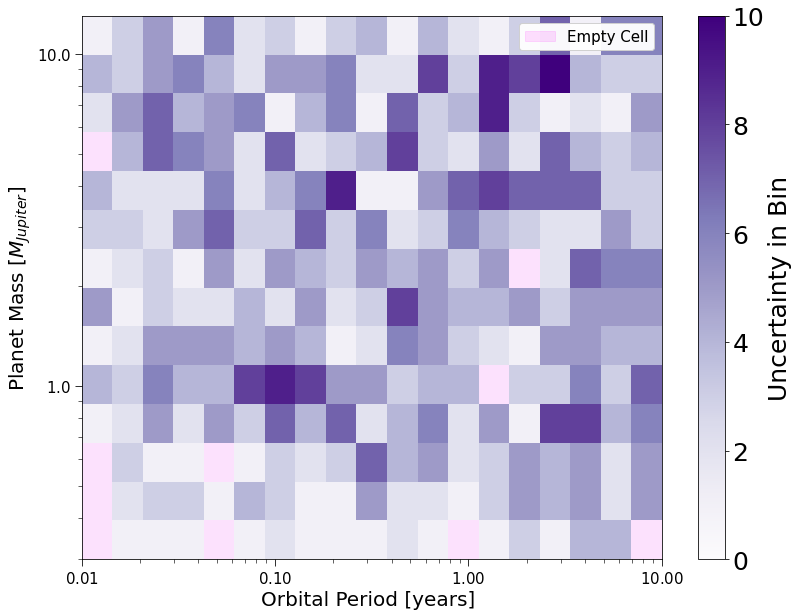

In [17]:
# Plotting the heatmap
fig, ax = plt.subplots(figsize=(13, 10))

             
im = ax.pcolormesh(Pbins,
                   Mbins,
                   num_planets_per_bin.T,
                   cmap='Purples',
                   vmin=num_planets_per_bin.min(),
                   vmax=num_planets_per_bin.max())

im_mask = ax.pcolormesh(Pbins,
                        Mbins,
                        empty_cells.T,
                        cmap=cmap_empty_cells,
                        alpha = empty_cells_alpha) 

# Color bar
cbar = plt.colorbar(im, format=mticker.FuncFormatter(lambda y, _: '{:g}'.format(y)), orientation='vertical')
cbar.set_label('Uncertainty in Bin', fontsize=big_font)
cbar.ax.tick_params(labelsize=big_font)

# Axes labels 
ax.set_xlabel('Orbital Period [years] ', fontsize=medium_font)
ax.set_ylabel('Planet Mass [$M_{Jupiter}$]', fontsize=medium_font)

# Adding ticks to axes
ax.tick_params(labelsize=small_font, which='major', length=7)
ax.tick_params(which='minor', length=4)


# Set log scale for both axes
ax.set_xscale('log')
ax.set_yscale('log')

# Making axes labels not scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

empty_cell_legend = ax.legend(handles=[mpatches.Rectangle((0, 0), 1, 1, color=empty_cell_colour)], 
                              labels=['Empty Cell'], 
                              loc='upper right', 
                              fontsize=small_font)

ax.add_artist(empty_cell_legend)

# S/N plot

In [18]:
SN_data = df['S/N']
noise_data = df['Noise']

- $S/N$ has units of $\mu$as
- Based on the histogram, it has a Gaussian shape in logspace
- The bins have units of $\mu$as

In [ ]:
SN_bins = np.logspace(np.log10(SN_data.min()), np.log10(SN_data.max()), 15) 

# Calculate midpoints of SN bins
SN_bin_midpoints = (SN_bins[:-1] + SN_bins[1:]) / 2

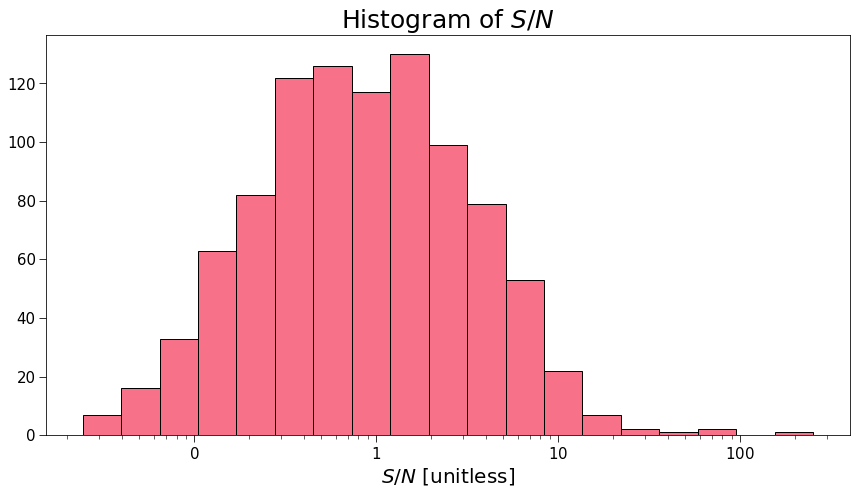

In [19]:
# Create a 2x1 figure of histograms
fig, axs = plt.subplots(figsize=(12,7))


# Plot histogram for S/N
axs.hist(SN_data, 
         bins=SN_bins, 
         color=my_colours[0], 
         edgecolor='black')

# Plot titles
axs.set_title('Histogram of $S/N$', fontsize=big_font)

# Axes scale 
axs.set_xscale('log')

# Axes labels 
axs.set_xlabel('$S/N$ [unitless]', fontsize=medium_font)

axs.tick_params(labelsize=small_font, which='major', length=7)
axs.tick_params(which='minor', length=4)


# Adjust layout
plt.tight_layout()

# Making axes labels not scientific notation
axs.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Show the plot
plt.show()

In [21]:
# Making the arrays
SN_uncertainty = np.zeros(len(SN_bins)-1)

for i,s in enumerate(SN_bins[:-1]):
    mask = (SN_data >= SN_bins[i]) & (SN_data < SN_bins[i+1])

    if mask.any():  # Check if any element in mask is True
        SN_uncertainty[i] = noise_data[i]

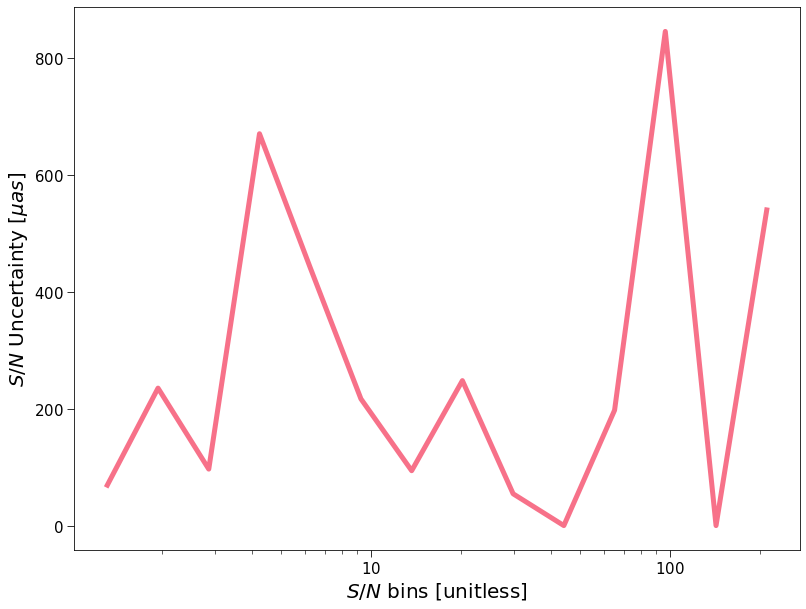

In [22]:
# Plotting the heatmap
fig, ax = plt.subplots(figsize=(13, 10))

             
line = ax.plot(SN_bin_midpoints,
               SN_uncertainty,
               color = my_colours[0],
               lw = 5)

# Axes labels 
ax.set_xlabel('$S/N$ bins [unitless]', fontsize=medium_font)
ax.set_ylabel('$S/N$ Uncertainty [$\mu as$]', fontsize=medium_font)

# Adding ticks to axes
ax.tick_params(labelsize=small_font, which='major', length=7)
ax.tick_params(which='minor', length=4)


# Set log scale for both axes
ax.set_xscale('log')
# ax.set_yscale('log')

# Making axes labels not scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))